In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df_mlp = pd.read_csv("df_geran_bert.csv")

In [3]:
df_mlp

,index,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,X..Geraniol
0,3,0.147638,0.127715,0.509446,0.032539,0.056278,-0.280844,0.527530,0.212648,0.050864,...,0.155563,0.164850,-0.106371,0.177229,-0.695585,0.023077,-0.674670,-0.076964,-0.590824,0.0
1,4,0.153703,0.129806,0.573836,0.061781,0.029730,-0.393227,0.782153,0.130317,-0.070932,...,0.114314,0.094989,-0.120709,0.243385,-0.737614,0.100473,-0.767890,-0.144897,-0.775545,0.0
2,11,0.170528,0.103973,0.662458,0.064816,0.057608,-0.352557,0.769633,0.161602,-0.060384,...,0.177055,0.108112,-0.087304,0.253053,-0.742809,0.064430,-0.801632,-0.197547,-0.772660,0.0
3,12,0.145553,0.092642,0.594356,0.082372,0.070935,-0.329163,0.570402,0.198113,-0.011617,...,0.134862,0.157927,-0.132747,0.216044,-0.736114,0.027545,-0.658038,-0.140654,-0.657726,0.0
4,21,0.154579,0.127039,0.439932,-0.015416,0.079761,-0.287995,0.496048,0.237986,0.029639,...,0.128155,0.134109,-0.097079,0.186108,-0.726896,0.019775,-0.548384,-0.115055,-0.545315,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,42970,0.109320,0.095256,0.523631,-0.007430,0.055264,-0.338708,0.570877,0.232808,-0.009438,...,0.124365,0.174935,-0.110914,0.197620,-0.678949,0.039182,-0.663883,-0.163899,-0.593018,0.0
44996,42972,0.102736,0.135983,0.550969,-0.014671,0.015193,-0.269029,0.679146,0.145063,-0.059002,...,0.252791,0.156139,-0.121033,0.199727,-0.782018,-0.003939,-0.664979,-0.150894,-0.634808,0.0
44997,42974,0.282075,0.149575,0.652933,0.145363,0.003963,-0.429747,0.819131,0.018761,-0.133602,...,0.133490,0.180182,-0.139251,0.378032,-0.731045,0.157516,-0.825618,-0.148141,-0.877954,0.0
44998,42975,0.136489,0.148309,0.570469,0.100240,-0.043398,-0.397642,0.790510,0.156836,-0.026515,...,0.122552,0.140842,-0.137621,0.211509,-0.724223,0.056200,-0.790721,-0.113418,-0.736053,0.0


In [4]:
X = df_mlp.drop(['index', 'X..Geraniol'], axis = 1)
y = df_mlp[['X..Geraniol']]

Plotting histograms on target variable

<AxesSubplot:ylabel='Count'>

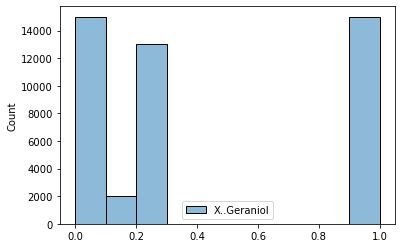

In [5]:
sns.histplot(y, bins = 10)

PCA

In [6]:
pca = PCA()
pca_comps = pca.fit_transform(X)

In [7]:
pca_comps

array([[ 2.21260948e+00, -5.01629238e-01,  4.17478579e-02, ...,
         6.67500911e-03, -7.12430322e-03, -1.88451830e-08],
       [-4.36518749e-01, -1.74710461e-01, -9.64365597e-02, ...,
        -6.78870917e-03, -2.38092976e-03,  4.10159359e-08],
       [-4.20805721e-01, -4.14878274e-01, -1.38262582e-01, ...,
         6.33056430e-04, -2.50834842e-03,  1.40684671e-08],
       ...,
       [-2.60642488e+00,  1.08703702e+00, -7.62569624e-02, ...,
         3.20716743e-04,  1.33208973e-03, -6.71683083e-08],
       [-2.66694060e-01, -3.60259658e-01, -1.13814226e-01, ...,
         7.70360522e-05,  1.93801162e-03,  2.69762388e-08],
       [ 5.99369133e+00,  1.00445118e+00,  7.15955749e-01, ...,
        -1.52916081e-02,  3.53038017e-03, -3.34032926e-08]])

In [8]:
type(pca_comps)

numpy.ndarray

In [9]:
explained_variance = pca.explained_variance_ratio_

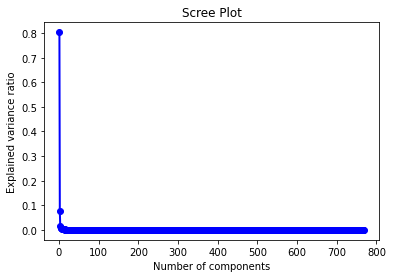

In [10]:
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.show()

In [11]:
# Calculate the second derivative of the explained variance ratio curve
second_der = np.diff(explained_variance, 2)

# Find the index of the maximum value of the second derivative
elbow_index = np.argmax(second_der) + 1

# The optimal number of components is the index of the elbow point
n_components_optimal = elbow_index

In [12]:
n_components_optimal

1

In [13]:
X_reduced = pca.transform(X)[:, :n_components_optimal]

In [14]:
X_reduced

array([[ 2.21260948],
       [-0.43651875],
       [-0.42080572],
       ...,
       [-2.60642488],
       [-0.26669406],
       [ 5.99369133]])

train test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=1, test_size=0.2)

In [16]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

MLP (before feature selection and hyperparameter tuning)

In [17]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
mean_absolute_error(y_val, y_pred_mlp)

0.3943921459923357

In [19]:
mean_squared_error(y_val, y_pred_mlp)

0.18384008989415246

In [20]:
mean_squared_error(y_val, y_pred_mlp, squared = False)

0.42876577509655833

In [21]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.009289266918591776

In [22]:
#val
r2_score(y_val, y_pred_mlp)

0.005244161508425882

Hyperparameter tuning (MLP)

In [23]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [24]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [25]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [26]:
rscv.best_params_

{'max_iter': 200, 'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu'}

In [27]:
joblib.dump(rscv, "rscv_mlp_bert_geran.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_bert_best_params_geran.pkl")

['rscv_mlp_bert_best_params_geran.pkl']

kNN (after hyperparameter tuning)

In [28]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=200, activation = 'relu', hidden_layer_sizes= (50,50,50), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.3860317096644445

In [30]:
mean_squared_error(y_val, y_pred_mlp_ht)

0.18111821319117336

In [31]:
mean_squared_error(y_val, y_pred_mlp_ht, squared = False)

0.42557985524596126

In [32]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.027943963070634847

In [33]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.019972193590555354

Predicting on the test set (MLP)

In [34]:
y_pred_mlp_test = mlpreg_ht.predict(X_test)

In [35]:
joblib.dump(y_pred_mlp_test, "y_pred_mlp_test_bert_geran.pkl")
joblib.dump(y_test, "y_test_mlp_bert_geran.pkl")

['y_test_mlp_bert_geran.pkl']

In [36]:
mean_absolute_error(y_test, y_pred_mlp_test)

0.3862879324212623

In [37]:
mean_squared_error(y_test, y_pred_mlp_test)

0.1810001006229377

In [38]:
mean_squared_error(y_test, y_pred_mlp_test, squared = False)

0.4254410659808685

In [39]:
r2_score(y_test, y_pred_mlp_test)

0.016580112865651864

Error analysis (kNN)

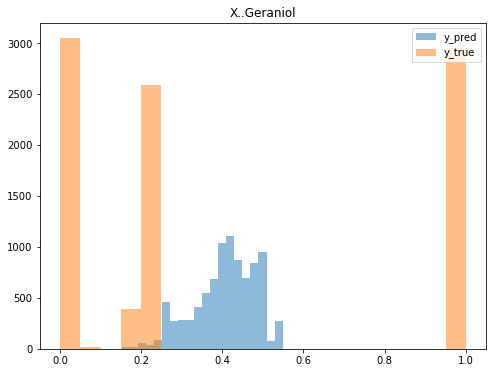

<Figure size 432x288 with 0 Axes>

In [40]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Geraniol"  # specify the target variable name
ax.hist(y_pred_mlp_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_bert_geran.png')

Pearson R

In [41]:
corr_coef, p_value = pearsonr(y_pred_mlp_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.136
P-value: 0.000


<AxesSubplot:>

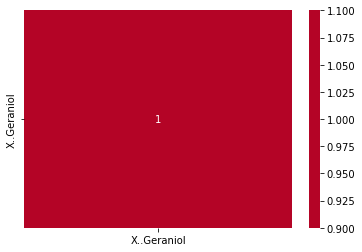

In [42]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)